# Import Data Set

In [1]:
# simple linear regression assigment
#Q1) Delivery_time -> Predict delivery time using sorting time 
import pandas as pd
import numpy as np
import sweetviz as sv

In [2]:
data = pd.read_csv("Delivery_Time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [6]:
data[data.duplicated()].shape

(0, 2)

In [7]:
data[data.duplicated()]

,Delivery Time,Sorting Time


In [8]:
data1=data.drop_duplicates()

In [9]:
data1

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


# Correlation

In [10]:
data1.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [11]:
data2=data1.rename({'Delivery Time':'DTime'},axis=1)

In [12]:
data2

,DTime,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
data3=data2.rename({'Sorting Time':'STime'},axis=1)

In [14]:
data3

,DTime,STime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='STime', ylabel='Density'>

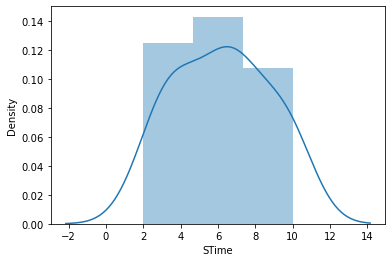

In [15]:
import seaborn as sns
sns.distplot(data3['STime'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DTime', ylabel='Density'>

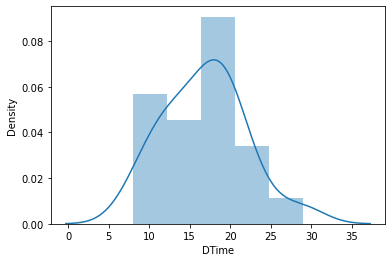

In [16]:
import seaborn as sns
sns.distplot(data3['DTime'])

Fitting a Linear Regression Model

In [23]:
import statsmodels.formula.api as smf
model=smf.ols("STime~DTime", data=data3).fit()

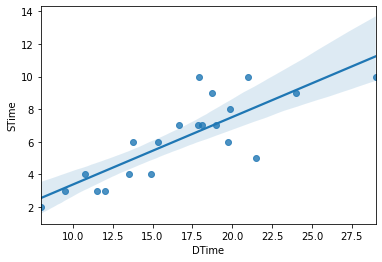

In [24]:
import statsmodels.formula.api as smf
sns.regplot(y="STime",x="DTime",data=data3);

In [25]:
#Coefficients
model.params

Intercept   -0.756673
DTime        0.413744
dtype: float64

In [26]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept   -0.667290
DTime        6.387447
dtype: float64 
 Intercept    0.512611
DTime        0.000004
dtype: float64


In [27]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

In [31]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

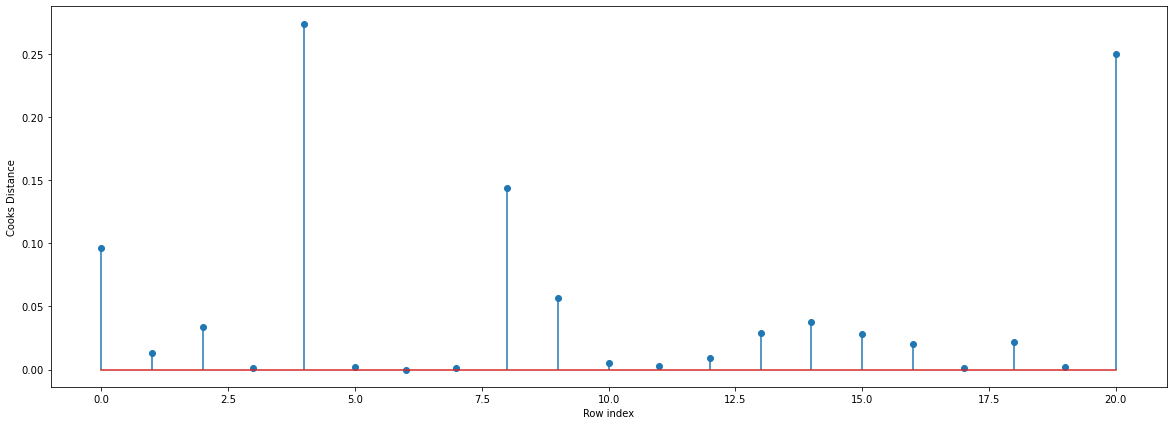

In [91]:
#Plot the influencers values using stem plot
import matplotlib.pyplot as plt
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data3)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

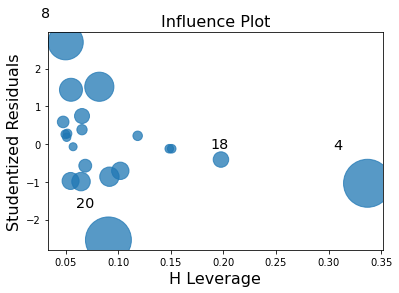

In [87]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [194]:
data4=data3.drop(data3.index[[0,3,5,7,8,9,12,13,15,19,17]],axis=0).reset_index()

In [195]:
data4=data4.drop(['index'],axis=1)

In [196]:
data4

,DTime,STime
0,13.50,4
1,19.75,6
2,29.00,10
3,19.00,7
4,19.83,8
5,10.75,4
6,12.03,3
7,13.75,6
8,8.00,2
9,21.50,5


In [200]:
data5=data4.drop(data4.index[[8]],axis=0).reset_index()

In [203]:
data5=data5.drop(['index'],axis=1)

In [204]:
import statsmodels.formula.api as smf
model=smf.ols("STime~DTime", data=data5).fit()

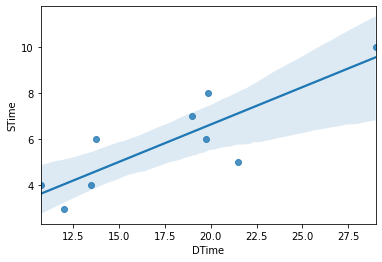

In [205]:
import statsmodels.formula.api as smf
sns.regplot(y="STime",x="DTime",data=data5);

In [206]:
(model.rsquared, model.rsquared_adj)

(0.7184441724896894, 0.6782219114167879)

# Predict for new data point

In [207]:
#Predict for 20 and 21 delivery time
newdata=pd.Series([21,13.5])

In [208]:
data_pred=pd.DataFrame(newdata,columns=['DTime'])

In [209]:
model.predict(data_pred)

0    6.964731
1    4.535178
dtype: float64

In [46]:
#Q2)Salary_hike -> Build a prediction model for Salary_hike
import pandas as pd
import numpy as np

In [47]:
data=pd.read_csv("salary_Data.csv")

In [48]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [49]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [51]:
data[data.duplicated()].shape

(0, 2)

In [52]:
data[data.duplicated()]

,YearsExperience,Salary


In [53]:
data1=data.drop_duplicates()

In [54]:
data1.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

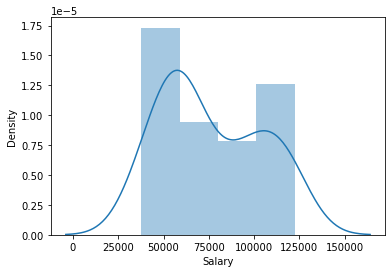

In [55]:
import seaborn as sns
sns.distplot(data1['Salary'])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

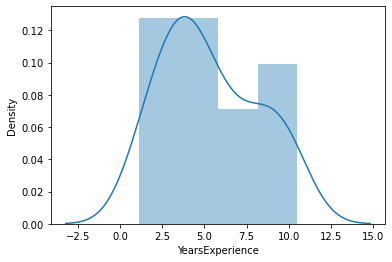

In [56]:
import seaborn as sns
sns.distplot(data1['YearsExperience'])

In [57]:
import statsmodels.formula.api as smf
import seaborn as sns
model=smf.ols("Salary~YearsExperience",data=data).fit()

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

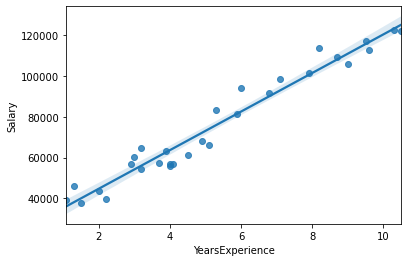

In [58]:
sns.regplot(x='YearsExperience',y='Salary',data=data)

In [59]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [60]:
#t and p-values
print(model.tvalues,"\n",model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [61]:
# r squres values
(model.rsquared, model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

In [62]:
#predict for new data point like 2 and 3
newdata=pd.Series([2,3])

In [63]:
data_pred=pd.DataFrame(newdata,columns=["YearsExperience"])

In [64]:
model.predict(data_pred)

0    44692.124842
1    54142.087163
dtype: float64